In [1]:
data_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics/data/single-cell/exploratory"
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os

os.chdir(working_dir)

import yaml
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import mudata as md
import muon as mu
import numpy as np
import scanpy as sc
from matplotlib import gridspec
import scanpy.external as sce
from scipy import sparse
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

from utils.utils import *
from utils.plotting import *

sc.settings.verbosity = 0
sc.set_figure_params(dpi=80)
sns.set(style="white")

Global seed set to 0
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [3]:
path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_Tcells_HarmonyR.h5mu"
)
mudata = md.read_h5mu(path)

mod_rna = mudata.mod["rna"]
mod_cite = mudata.mod["cite"]

In [4]:
cluster_key = "leiden_1.7"

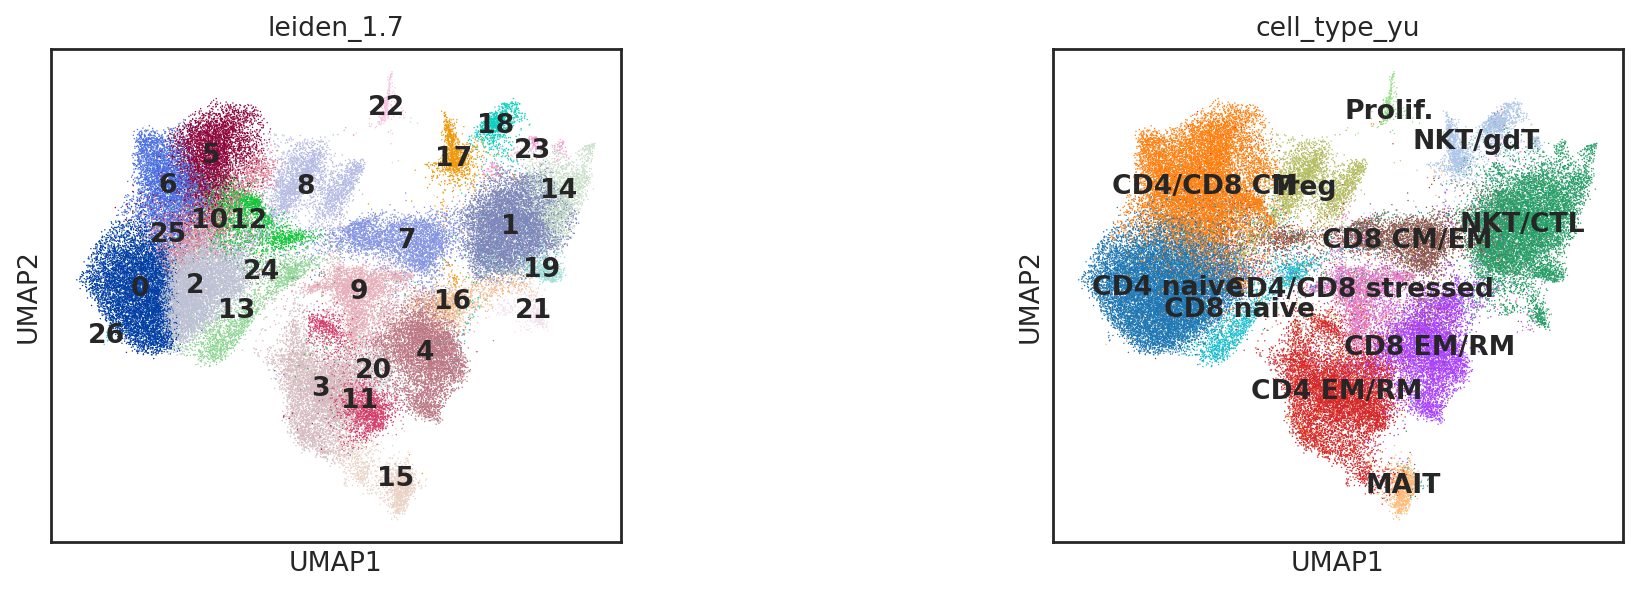

In [5]:
sc.pl.umap(
    mod_rna, color=[cluster_key, "cell_type_yu"], legend_loc="on data", wspace=0.6
)

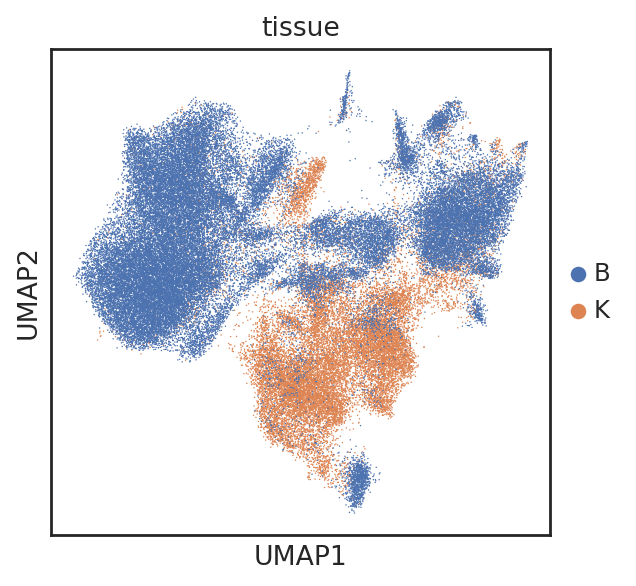

In [6]:
sc.pl.umap(mod_rna, color="tissue")

In [7]:
annotations = {
    "0": "CD4+ naive",
    "1": "NKT/CTL",
    "2": "CD4+ naive",
    "3": "CD4+ EM/RM",
    "4": "CD8+ EM/RM",
    "5": "CD4+ CM",
    "6": "CD4+/CD8+ CM",
    "7": "CD8+ CM/EM",
    "8": "Treg",
    "9": "CD4+/CD8+ stressed",
    "10": "CD4+ CM",
    "11": "CD4+ EM/RM",
    "12": "CD4+ CM",
    "13": "CD8+ naive",
    "14": "NK",
    "15": "MAIT",
    "16": "CD8+ EM/RM",
    # "16": "NKT/CTL",
    "17": "gdT",
    "18": "NKT",
    "19": "NKT/CTL",
    "20": "CD4+ EM/RM",
    "21": "NKT/CTL",
    "22": "Prolif.",
    "23": "gdT",
    "24": "CD4+ CM",
    "25": "CD4+ CM",
    "26": "CD4+ naive",
}

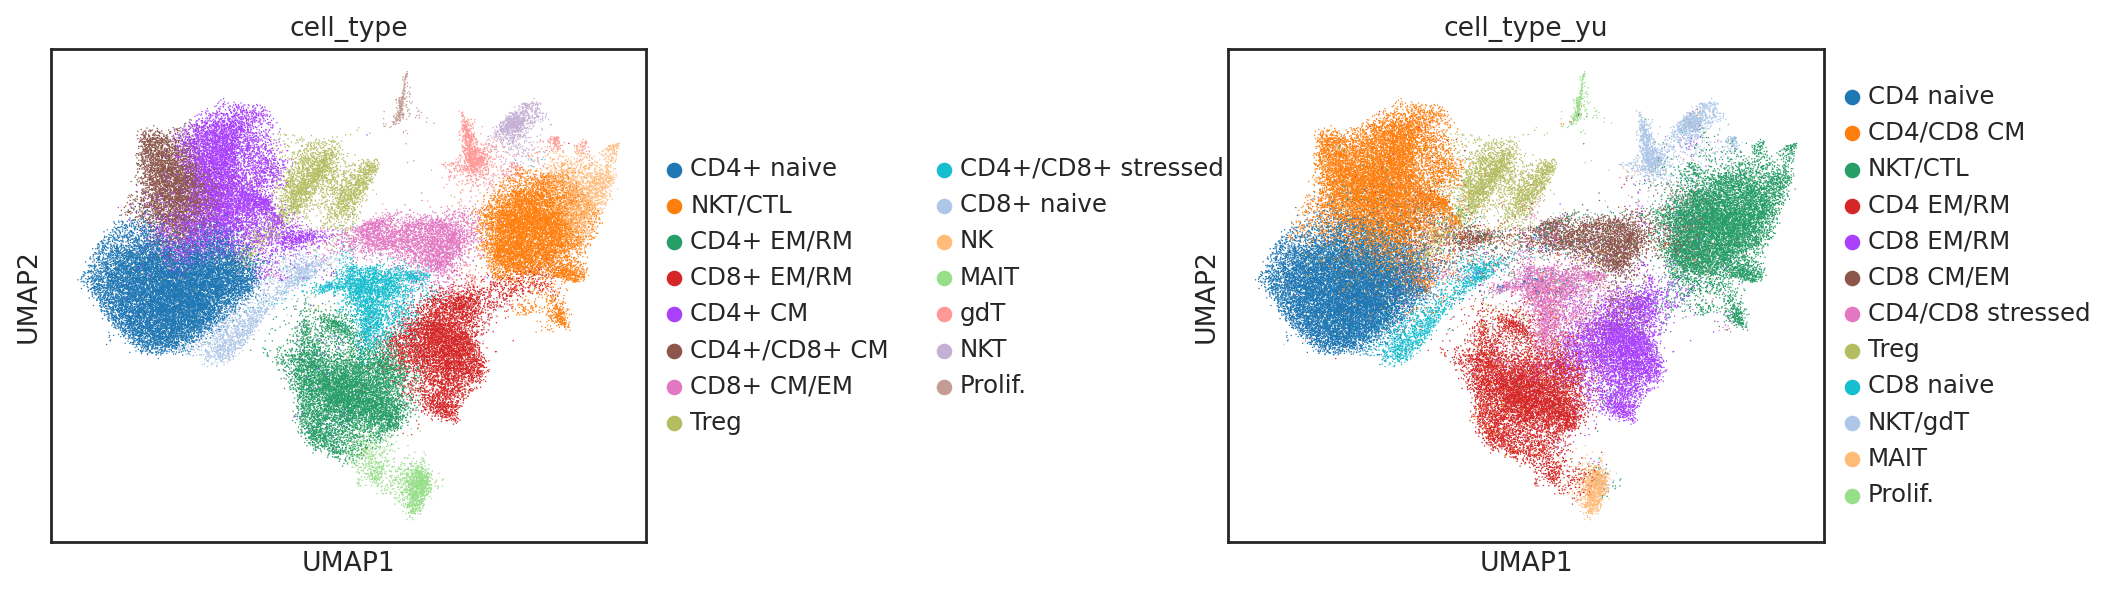

In [8]:
mod_rna.obs["cell_type"] = mod_rna.obs[cluster_key].replace(annotations)
sc.pl.umap(mod_rna, color=["cell_type", "cell_type_yu"], wspace=0.8)

In [9]:
annotations_updated = {
    "0": "CD4+ naive",
    "1": "NKT/CTL",
    "2": "CD4+ naive",
    "3": "CD4+ Teff",
    "4": "CD8+ Teff",
    "5": "CD4+ Tcm",
    "6": "CD4+/CD8+ Tcm",
    "7": "CD8+ Tem",
    "8": "Treg",
    "9": "stressed T cells",
    "10": "CD4+ Tcm",
    "11": "CD4+ Teff",
    "12": "CD4+ Tcm",
    "13": "CD8+ naive",
    "14": "NK",
    "15": "MAIT",
    "16": "CD8+ Teff",
    "17": "gdT",
    "18": "NKT",
    "19": "NKT/CTL",
    "20": "CD4+ Teff",
    "21": "NKT/CTL",
    "22": "Prolif.",
    "23": "gdT",
    "24": "CD4+ Tcm",
    "25": "CD4+ Tcm",
    "26": "CD4+ naive",
}

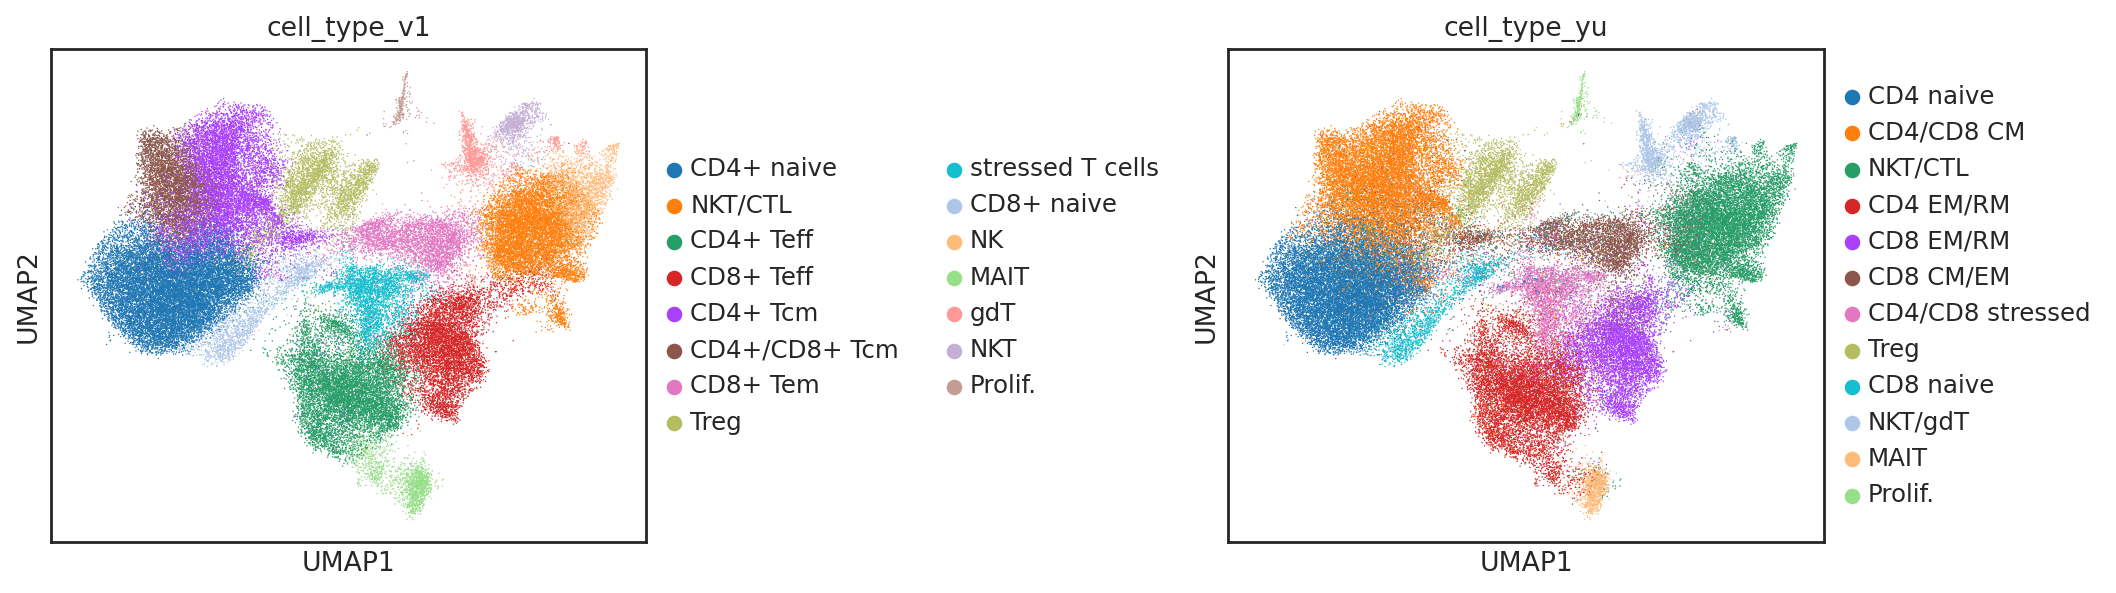

In [10]:
mod_rna.obs["cell_type_v1"] = mod_rna.obs[cluster_key].replace(annotations_updated)
sc.pl.umap(mod_rna, color=["cell_type_v1", "cell_type_yu"], wspace=0.8)

In [11]:
mod_rna

AnnData object with n_obs × n_vars = 72416 × 21419
    obs: 'patient', 'sample', 'tissue', 'cell_type_yu', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'cell_type', 'cell_type_v1'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'cell_type_yu_colors', 'leiden', 'leiden_0.3_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.7_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden_1.0_colors', 'leiden_1.1_colors', 'leiden_1.2_colors', 'leiden_1.3_colors', 'leiden_1.4_colors', 'leiden_1.5_colors', 'leiden_1.6_colors', 'leiden_1.7_colors', 'leiden_1.8_colors', 

In [12]:
mudata = md.MuData(
    {
        "rna": mod_rna.copy(),
        "cite": mod_cite.copy(),
    }
)
save_path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_Tcells_HarmonyR_annotated.h5mu"
)
mudata.write_h5mu(save_path)

In [13]:
# print color code for each cluster
celltype_key = "cell_type"
colors = mod_rna.uns[f"{celltype_key}_colors"]
color_codes = {
    cluster: colors[k] for k, cluster in enumerate(mod_rna.obs[celltype_key].unique())
}

In [14]:
color_map_old = {
    "CD4+ naive": "#1f77b4",
    "CD4+/CD8+ CM": "#ff7f0e",
    "NKT/CTL": "#279e68",
    "CD4+ EM/RM": "#d62728",
    "CD8+ EM/RM": "#aa40fc",
    "CD8+ CM/EM": "#8c564b",
    "CD4+/CD8+ stressed": "#e377c2",
    "Treg": "#b5bd61",
    "CD8+ naive": "#17becf",
    "NKT/gdT": "#aec7e8",
    "MAIT": "#ffbb78",
    "Prolif.": "#98df8a",
}
color_map = {
    "CD4+ naive": "#1f77b4",
    "CD4+/CD8+ CM": "#ff7f0e",
    "NKT/CTL": "#279e68",
    "CD4+ EM/RM": "#d62728",
    "CD8+ EM/RM": "#aa40fc",
    "CD8+ CM/EM": "#8c564b",
    "CD4+/CD8+ stressed": "#e377c2",
    "Treg": "#b5bd61",
    "CD8+ naive": "#17becf",
    "MAIT": "#ffbb78",
    "Prolif.": "#98df8a",
    "NKT": "#aec7e8",
    "gdT": "#c5b0d5",
    "CD4+ CM": "#ff9896",
    "NK": "#c49c94",
}

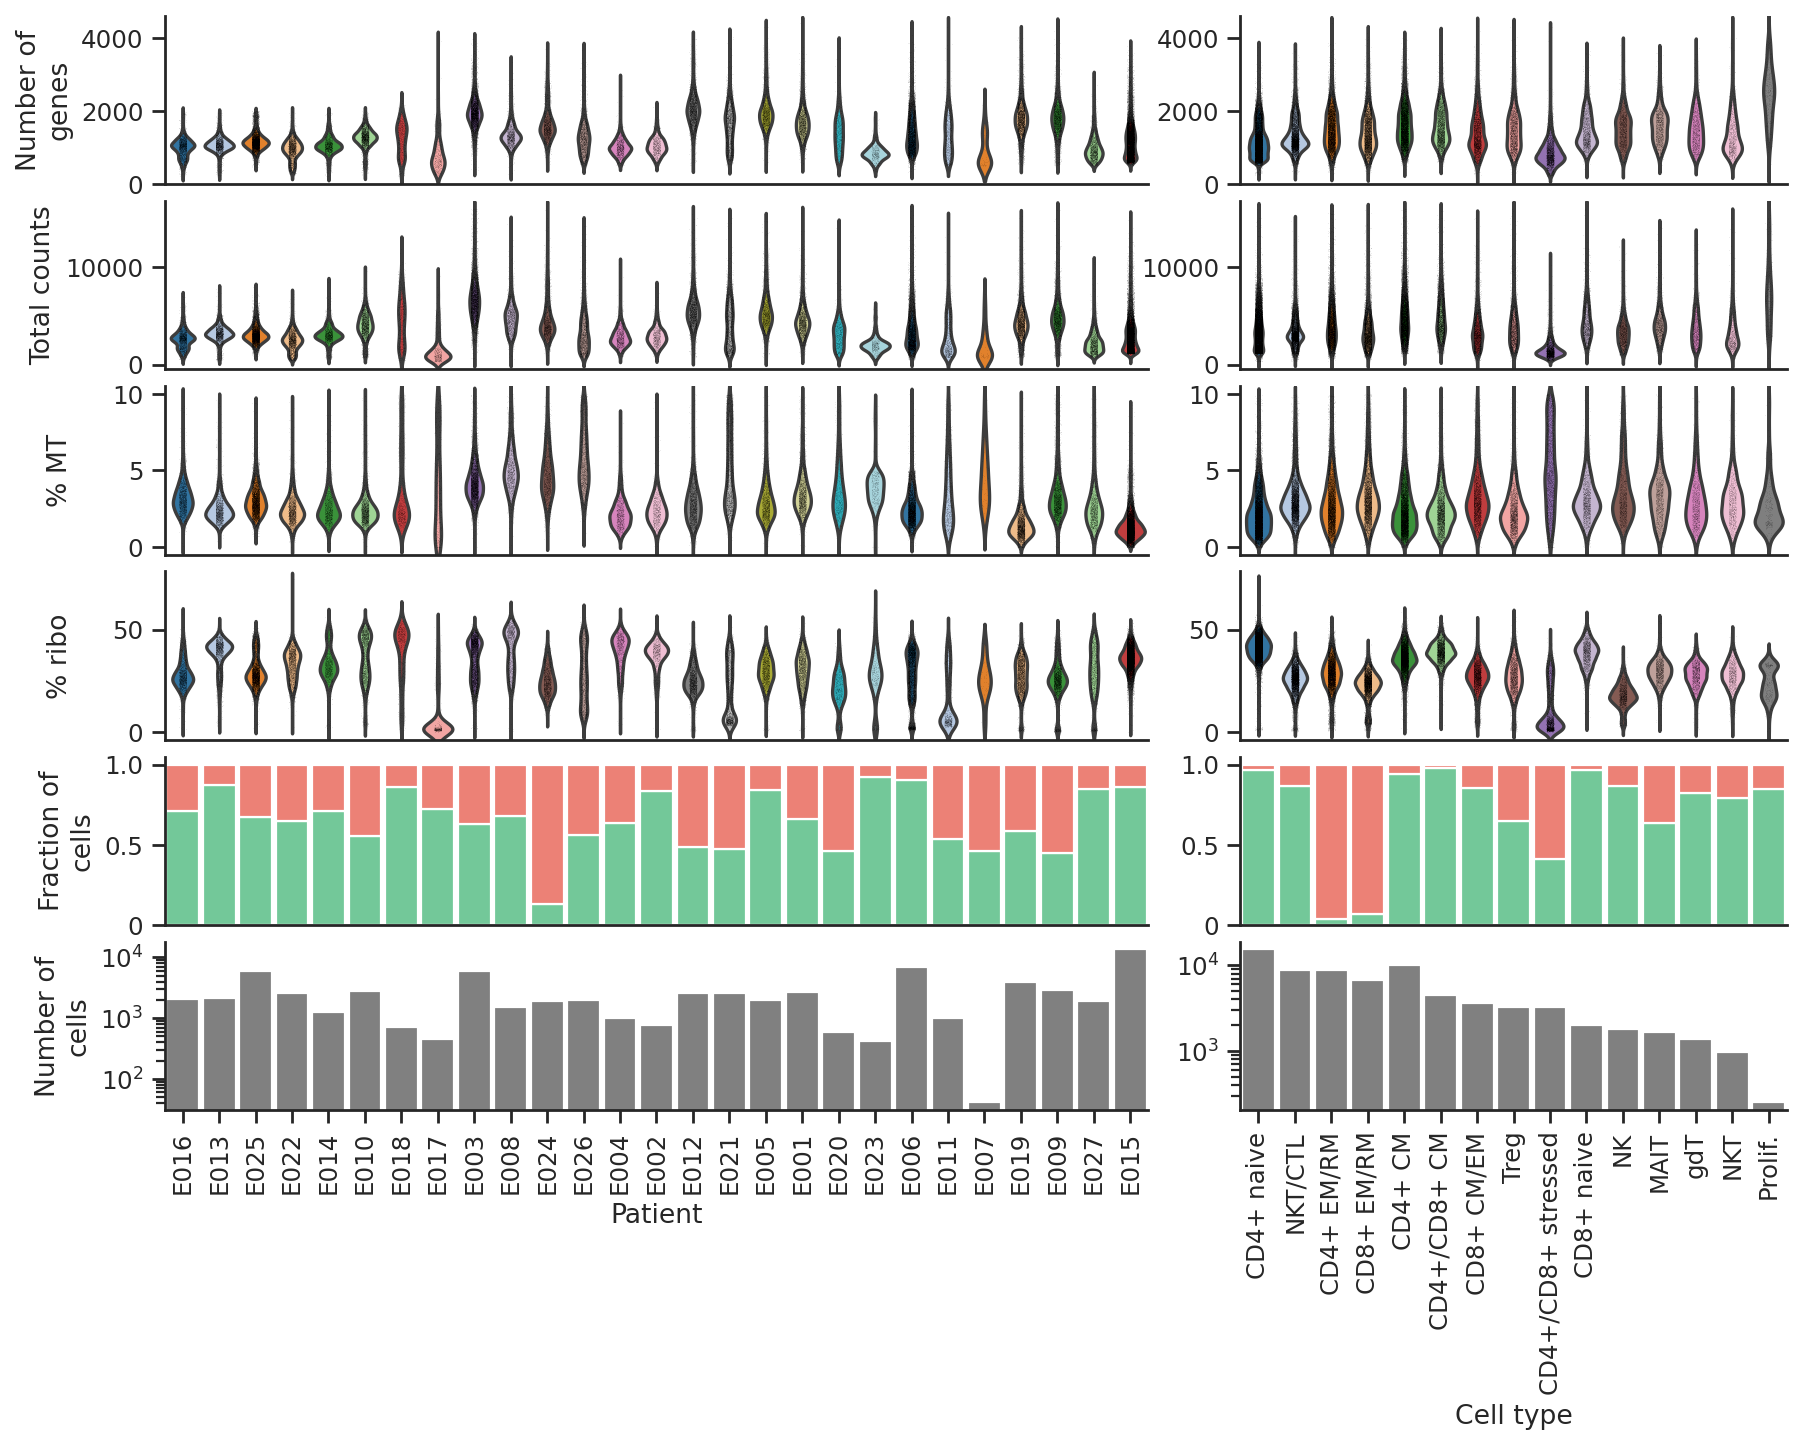

In [15]:
plot_qc(mod_rna, cell_type_key=celltype_key)